In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from ggplot import *
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


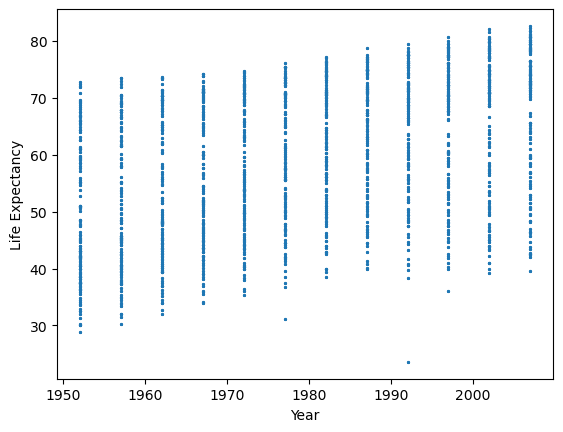

In [26]:
## Exercise 1

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.plot(data['year'], data['lifeExp'], '*', markersize= 2)

In [10]:
# Question 1
# Yes, there is a increasing trend for life expectancy across time. To me, it looks linear.

# Question 2
# The distribution of life expectancy across countries is strictly increasing
#over the years. It is not skewed or unimodal or symmetric around a point.

#Question 3 
# If we test for a relationship between year and life expectancy, we will
# likely REJECT the null hypothesis.

#Question 4
# I would expect the violin plots to be linear as well. I would  also expect a violin plot of residuals to have bigger bases in the early years
# up until 1970s. From there, the violins would have gradually bigger tops. 

#Question 5
# The violin plot should roughly center around zero according to these assumptions. 

Text(0, 0.5, 'Life Expectancy')

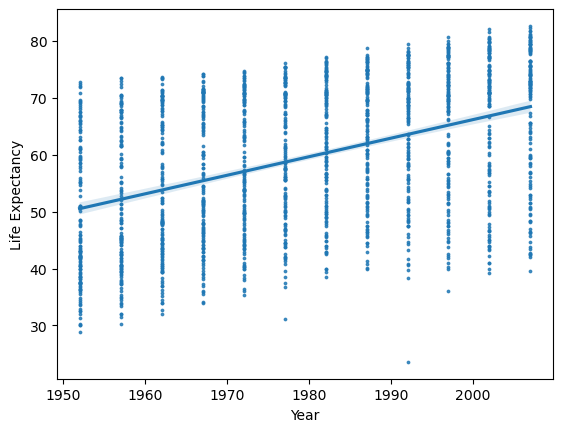

In [30]:
# Exercise 2
sns.regplot(x = "year", y = "lifeExp", data = data, scatter_kws={'s':3})
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

In [12]:
result = ols(formula = "lifeExp ~ year", data = data).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           7.55e-80
Time:                        19:06:20   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

In [13]:
#Question 6
# On average, life expectancy increases by 0.3259 every year around the world.

#Question 7
# The p-value is 0, which means the results are statistically signifcant. The null hypothesis is rejected.

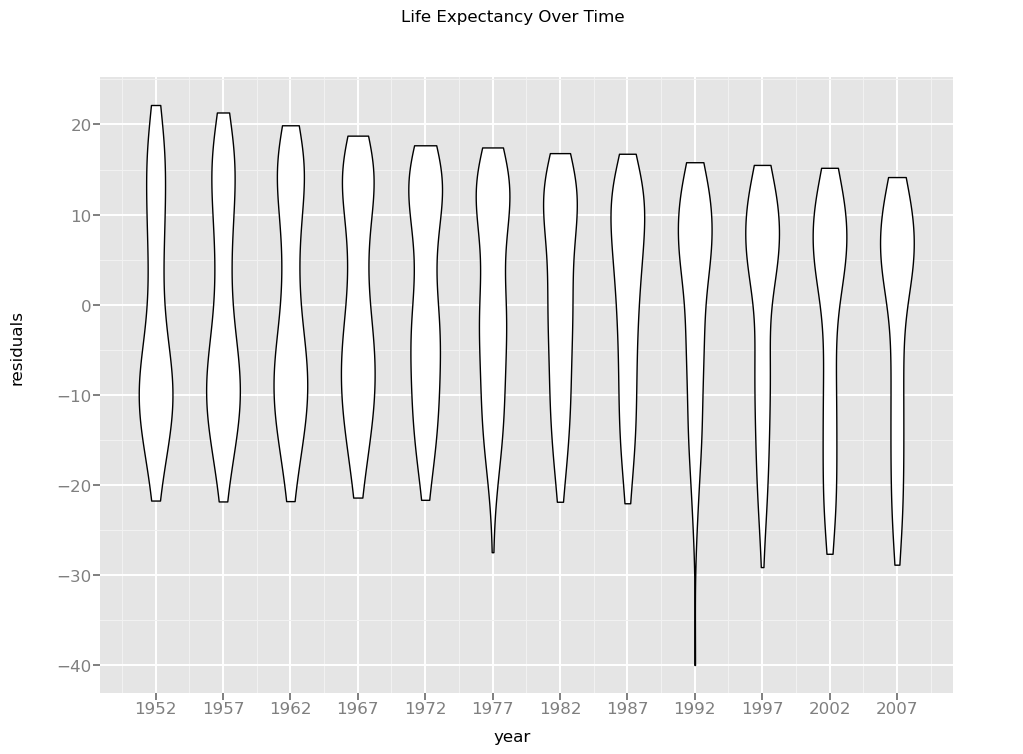

<ggplot: (8790063537421)>

In [14]:
# Exercise 3

data['expected'] = 0.0
for i, row in data.iterrows():
    e = result.params.year * (row['year']) + result.params.Intercept
    data.at[i, 'expected'] = e
data['residuals'] = data['lifeExp'] - data['expected']

ggplot(aes(x='year', y='residuals'), data=data) +\
    geom_violin() +\
    labs(title="Life Expectancy Over Time",
         x = "year",
         y = "residuals")

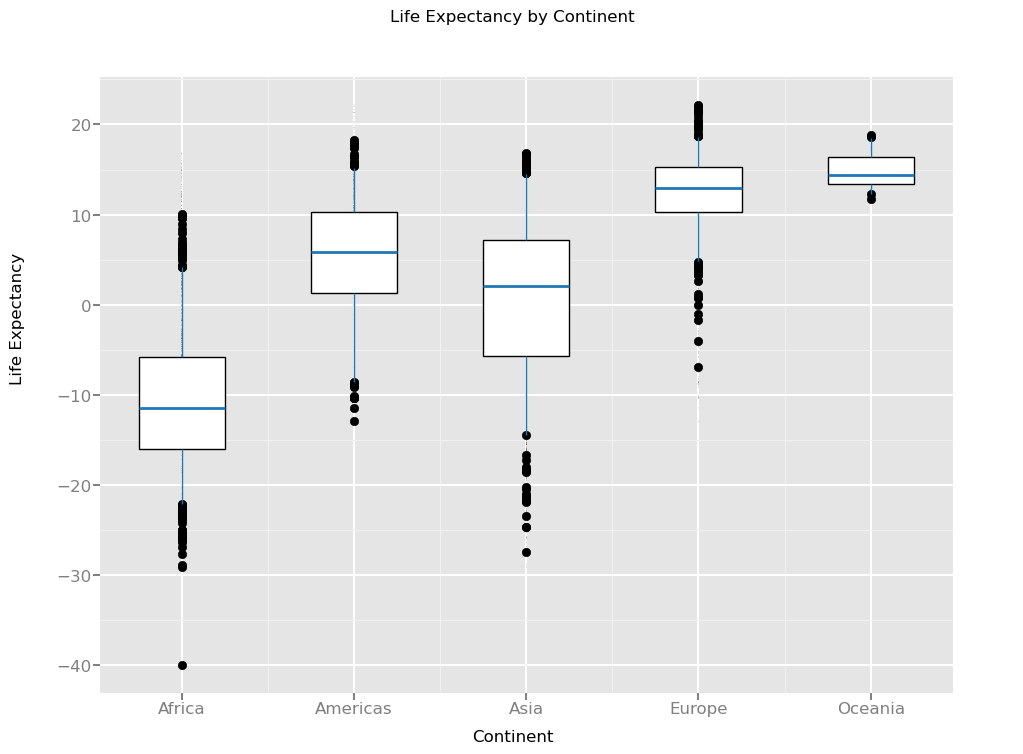

<ggplot: (8790031709344)>

In [34]:
#Question 8
# No. This plot is unimodal with 1 peak at 1992, and is skewed to the left. The plots all center around 0.

# Exercise 4
ggplot(aes(x='continent', y='residuals'), data=data) + geom_point(size= 0.1) +\
    geom_boxplot() +\
    labs(title="Life Expectancy by Continent",
         x = "Continent",
         y = "Life Expectancy")


In [16]:
#Question 9
# There is a dependence model between model residual and contient. Each continent has different max, mins, medians, lower Q1, upper Q3. Overall,
#each box is different which suggests that the linear regression lines could be different as well.

['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']


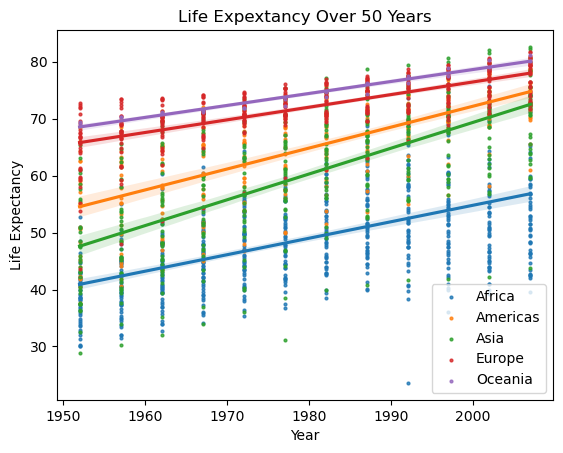

In [36]:
# Exercise 5
continent = np.unique(data['continent'])
print(continent)
for c in continent:
    p = data.drop(data[c != data['continent']].index)
    sns.regplot(x = "year", y = "lifeExp", data = p, label = c, scatter_kws={'s':4})
    
plt.title("Life Expextancy Over 50 Years")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()

In [18]:
#Question 10
# Yes, because the regression lines are very different for every continent. 
# Each continent varies in the life expectancy seen over the years, so it is important to 
# factor this in

In [19]:
# Exercise 6
model = ols(formula = 'lifeExp ~ year * continent', data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:06:22   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [37]:
#Question 11
# All except Oceana have a p value close to zero and less than 0.05 which means they are 
# significanlty different from zero. However, Oceana has a much larger p value both with and 
# without an interaction term, indicatin that it must not be significantly different.  

model.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

In [ ]:
# Question 12
# The above data indicates that life expectancy INCREASES by 
# 0.2895 in Africa, 0.078 in the Americas, and 0.1636 in Asia
# and DECREASES by 
# 0.0676 in Europe
# 0.0793 in Oceana

In [21]:
# Exercise 7
# F test for model a - simple linear regression
print("F test value for Linear Regression/Model 1:", result.fvalue)
# F test for model b - interaction 
print("F test value for Model 2:", model.fvalue)

F test value for Linear Regression/Model 1: 398.6047457117622
F test value for Model 2: 424.2729023400691


In [22]:
#Question 13
# Yes the interaction model is significantly better because it has a much higher F score

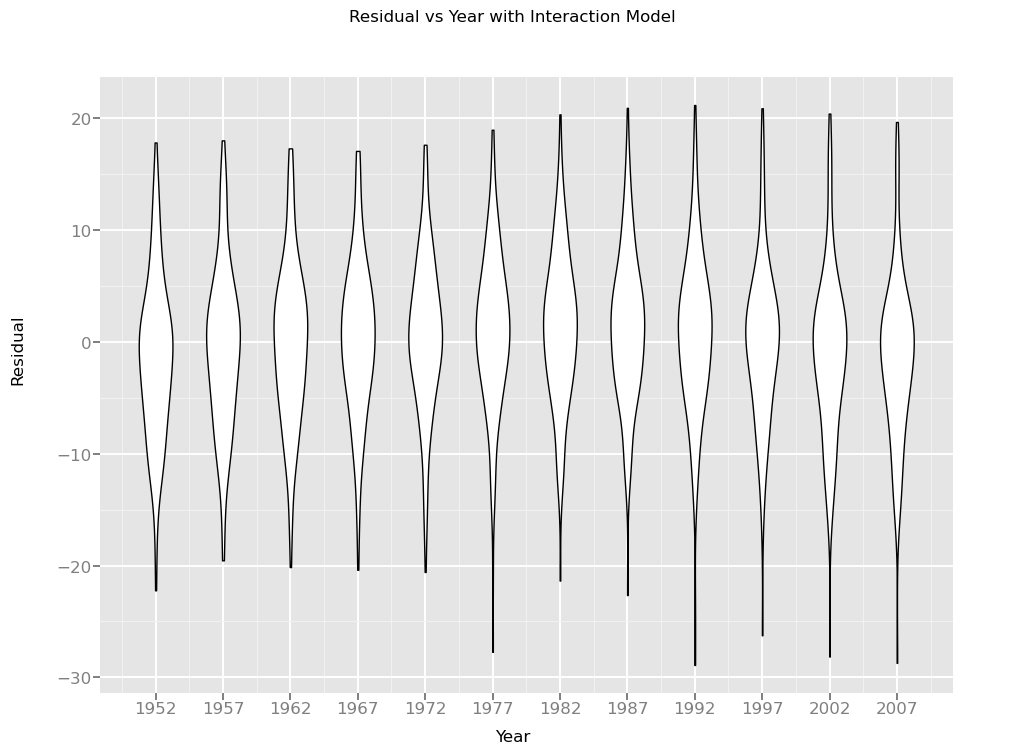

<ggplot: (8790028957347)>

In [23]:
## Exercise 8
predictedLifeExp = model.predict()
data['predictedLifeExp'] = pd.Series(predictedLifeExp, index = data.index)
data['residual'] = data['lifeExp'] - data['predictedLifeExp']
ggplot(aes(x='year', y='residual'), data=data) +\
    geom_violin() +\
    labs(title="Residual vs Year with Interaction Model",
         x = "Year",
         y = "Residual")

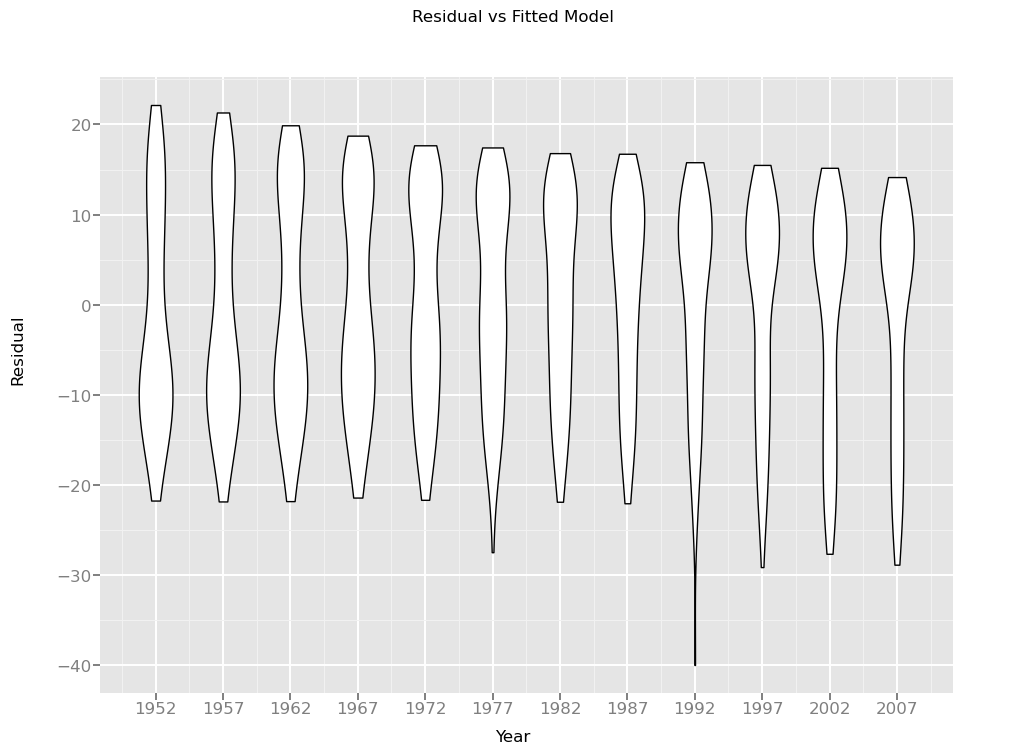

<ggplot: (8790049704674)>

In [49]:
# This matches the assumtpions of the linear data well because the bulk is centered around 0

# DIRECTIONS UNCLEAR FOR SECOND PART SO I HAVE PROVIDED TWO SEPARATE GRAPHS
# Residual vs. Fitted Values Violin Plot
ggplot(aes(x='year', y='residuals'), data=data) +\
    geom_violin() +\
    labs(title="Residual vs Fitted Model",
         x = "Year",
         y = "Residual")

Text(0, 0.5, 'Residual')

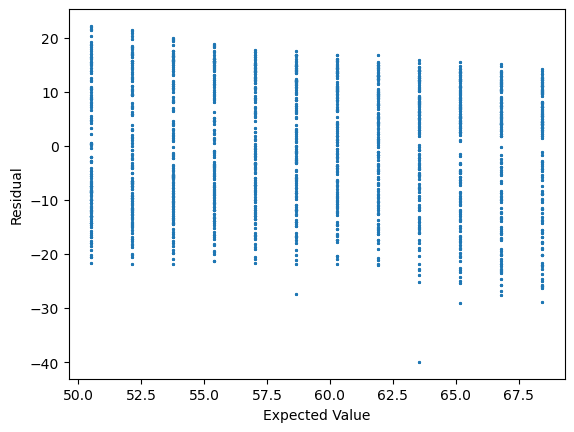

In [48]:
# This does make sense because the fitted model aligned with the data less well

# PIAZZA SAID DO SCATTER PLOT FOR FITTED VALUES AND RESIDUALS SO HERE'S THAT
plt.plot(data['expected'], data['residuals'], '*', markersize= 2)
plt.xlabel("Expected Value")
plt.ylabel("Residual")